# 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, #target_naems와 feature_names를 설정해줘야함
               feature_names = iris_data.feature_names, impurity = True, filled = True)

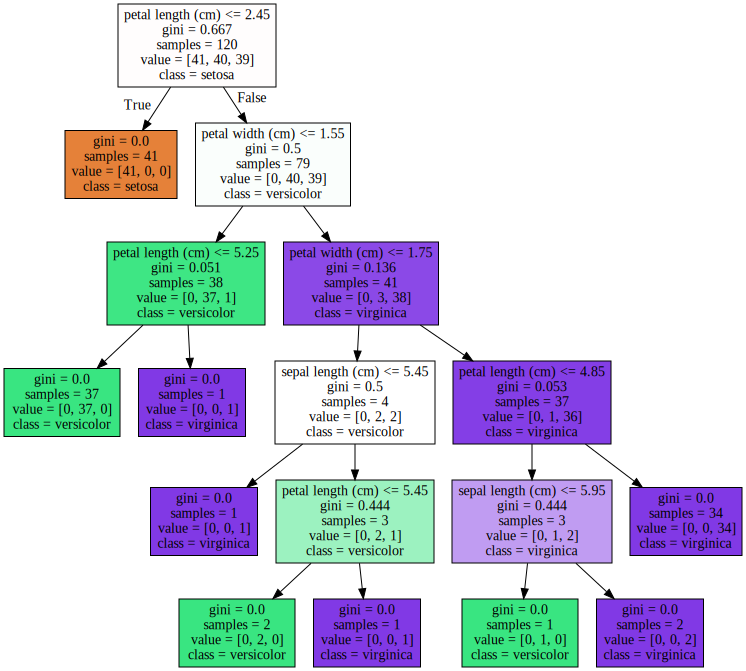

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)


## 결정트리의 Feature 선택 중요도

DecisionClassifier 객체는 feature_importance_를 통해 중요한 Feature들을 선택할 수 있게 정보를 제공

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

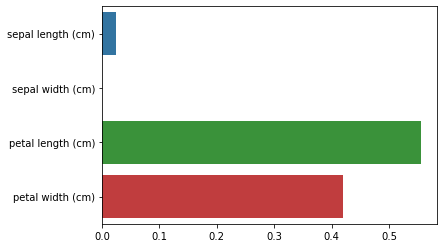

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature impotance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
    
# feature importance를 colums 별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

# 결정트리(Decision Tree) 과적합(Overfitting)

## 결정트리실습 - 사용자 행동 인식 데이터 세트

In [35]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 팡리들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당.
    feature_namde_df = pd.read_csv('./human_activity/features.txt', sep = "\s+",
                                  header = None, names = ['column_index', 'column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].unique().tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action 으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep = '\s+',  header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [36]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0.28858451, -0.020294171, -0.13290514, -0.9952786, -0.98311061, -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378, -0.56737807, -0.74441253, 0.85294738, 0.68584458, 0.81426278, -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081, -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187, 0.92929351, -0.85301114, 0.35990976, -0.058526382, 0.25689154, -0.22484763, 0.26410572, -0.09524563, 0.27885143, -0.46508457, 0.49193596, -0.19088356, 0.37631389, 0.43512919, 0.66079033, 0.96339614, -0.14083968, 0.11537494, -0.98524969, -0.98170843, -0.87762497, -0.98500137, -0.98441622, -0.89467735, 0.89205451, -0.16126549, 0.12465977, 0.97743631, -0.12321341, 0.05648273400000001, -0.37542596, 0.89946864, -0.97090521, -0.97551037, -0.98432539, -0.98884915, -0.91774264, -1.0, -1.0, 0.11380614, -0.590425, 0.5911463, -0.59177346, 0.59246928, -0.74544878, 0.72086167, -0.71237239, 0.7113000

In [37]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8626
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8637
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [50]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.851069
1,8,0.863718
2,10,0.849299
3,12,0.851751
4,16,0.843996
5,20,0.848484
6,24,0.848484


In [51]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [52]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8592
max_depth = 8 정확도 : 0.8666
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8704
max_depth = 16 정확도 : 0.8646
max_depth = 20 정확도 : 0.8673
max_depth = 24 정확도 : 0.8626


In [53]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [54]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8772


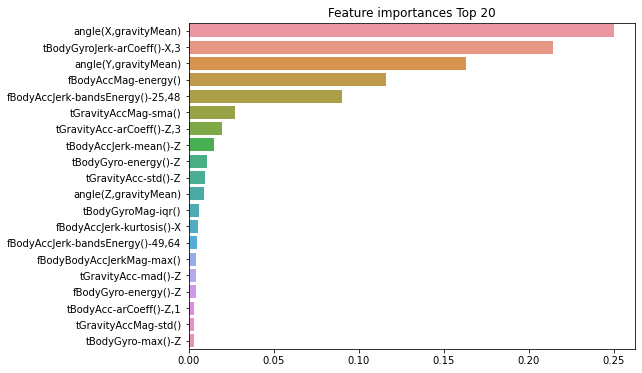

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
# TOP 중요도로 정렬을 쉽게하고 , 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 serise를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [58]:
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
ftr_top20

angle(X,gravityMean)                0.249987
tBodyGyroJerk-arCoeff()-X,3         0.214018
angle(Y,gravityMean)                0.163057
fBodyAccMag-energy()                0.116124
fBodyAccJerk-bandsEnergy()-25,48    0.089945
tGravityAccMag-sma()                0.027549
tGravityAcc-arCoeff()-Z,3           0.019748
tBodyAccJerk-mean()-Z               0.015199
tBodyGyro-energy()-Z                0.010818
tGravityAcc-std()-Z                 0.009607
angle(Z,gravityMean)                0.008917
tBodyGyroMag-iqr()                  0.006007
fBodyAccJerk-kurtosis()-X           0.005283
fBodyAccJerk-bandsEnergy()-49,64    0.004774
fBodyBodyAccJerkMag-max()           0.004436
tGravityAcc-mad()-Z                 0.004403
fBodyGyro-energy()-Z                0.004327
tBodyAcc-arCoeff()-Z,1              0.003484
tGravityAccMag-std()                0.003323
tBodyGyro-max()-Z                   0.003019
dtype: float64